# Weather Data

## Setup

In [1]:
# pip install cdsapi

In [2]:
# pip install xarray netCDF4 matplotlib cartopy

In [3]:
import cdsapi
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
import cartopy.crs as ccrs
import cartopy.feature as cfeature

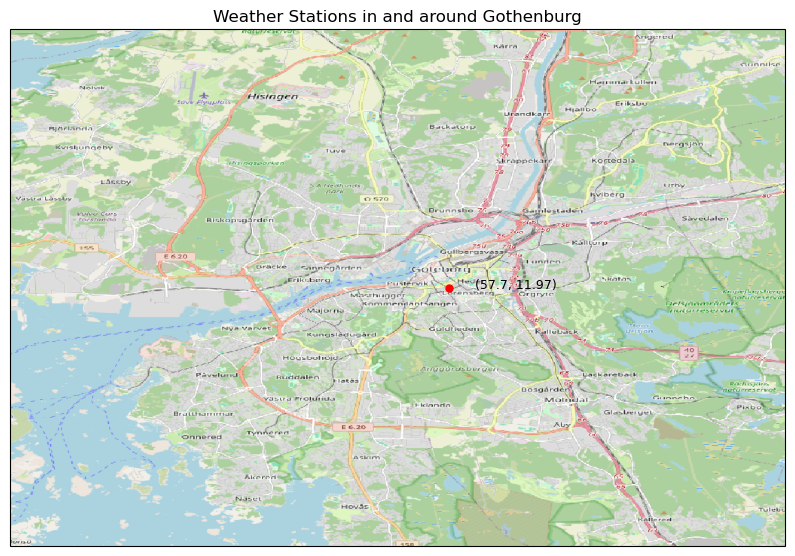

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

# Coordinates for the points in and around Gothenburg
coordinates = [
    (57.7, 11.97)#,  # Central Gothenburg
    #(57.72, 12.0),  # Nearby location 1
    #(57.68, 11.9)   # Nearby location 2
]

# Use OpenStreetMap tiles
osm_tiles = cimgt.OSM()

# Plot the map
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([11.8, 12.1, 57.6, 57.8], crs=ccrs.PlateCarree())

# Add the OpenStreetMap tiles
ax.add_image(osm_tiles, 12)  # 12 is the zoom level

# Plot the stations
for lat, lon in coordinates:
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.01, lat, f'({lat}, {lon})', transform=ccrs.PlateCarree(), fontsize=9)

plt.title('Weather Stations in and around Gothenburg')
plt.show()


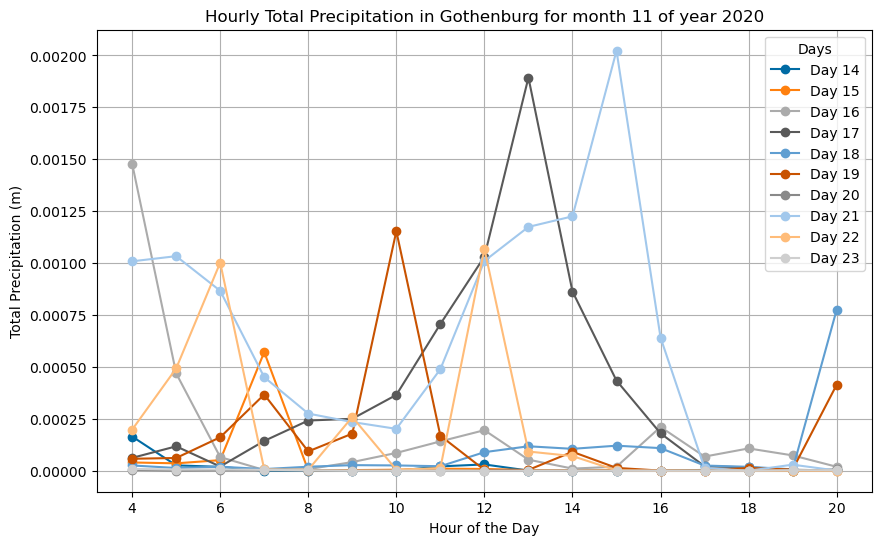

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Coordinates for the point in Gothenburg
lat, lon = 57.7, 11.97  # Central Gothenburg

# Specify the year and month
year = 2020
month = 11

# List of days to plot
days = range(14,24)

# Plot the data
plt.figure(figsize=(10, 6))

for day in days:
    # Load the data
    ds = xr.open_dataset(f'weather_data/prec_Nov_{year}/year_{year}_mon_{month:02d}_day_{day:02d}_lat_{lat}_lon_{lon}.nc')

    # Extract precipitation data
    precip = ds['tp']  # 'tp' stands for total precipitation

    # Select the specific point (using the nearest grid point)
    precip_point = precip.sel(latitude=lat, longitude=lon, method='nearest')

    # Normalize the time to just hours (00:00 to 23:00)
    hours = precip_point.time.dt.hour

    # Plot the time series data
    plt.plot(hours, precip_point, marker='o', label=f'Day {day}')

# Add plot details
plt.title(f'Hourly Total Precipitation in Gothenburg for month {month} of year {year}')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Precipitation (m)')
plt.legend(title='Days')
plt.grid(True)
plt.show()